# Projet Data Science - COVID-19

Tomás Mejia, Antoine Balannec, Alexandre Le Borgne, Sébastien Hierso


## Datasets:

data datasoft: https://public.opendatasoft.com/explore/dataset/covid-19-pandemic-worldwide-data/export/?disjunctive.zone&disjunctive.category&refine.zone=France

data gouv: https://github.com/opencovid19-fr/data


In [1]:
import pandas as pd
import numpy as np

# 1er Dataset: Chiffres clés de Covid-19 en France

In [154]:
url="https://raw.githubusercontent.com/opencovid19-fr/data/master/dist/chiffres-cles.csv"
c=pd.read_csv(url)

# Data

In [3]:
df1 = pd.DataFrame(c)

df1

,date,granularite,maille_code,maille_nom,cas_confirmes,cas_ehpad,cas_confirmes_ehpad,cas_possibles_ehpad,deces,deces_ehpad,reanimation,hospitalises,nouvelles_hospitalisations,nouvelles_reanimations,gueris,depistes,source_nom,source_url,source_archive,source_type
0,2020-01-24,departement,DEP-16,Charente,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARS Nouvelle-Aquitaine,https://www.nouvelle-aquitaine.ars.sante.fr/co...,NaN,agences-regionales-sante
1,2020-01-24,departement,DEP-17,Charente-Maritime,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARS Nouvelle-Aquitaine,https://www.nouvelle-aquitaine.ars.sante.fr/co...,NaN,agences-regionales-sante
2,2020-01-24,departement,DEP-19,Corrèze,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARS Nouvelle-Aquitaine,https://www.nouvelle-aquitaine.ars.sante.fr/co...,NaN,agences-regionales-sante
3,2020-01-24,departement,DEP-23,Creuse,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARS Nouvelle-Aquitaine,https://www.nouvelle-aquitaine.ars.sante.fr/co...,NaN,agences-regionales-sante
4,2020-01-24,departement,DEP-24,Dordogne,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARS Nouvelle-Aquitaine,https://www.nouvelle-aquitaine.ars.sante.fr/co...,NaN,agences-regionales-sante
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27393,2020-10-01,region,REG-75,Nouvelle-Aquitaine,NaN,NaN,NaN,NaN,504.0,NaN,59.0,334.0,37.0,5.0,2766.0,NaN,OpenCOVID19-fr,NaN,NaN,opencovid19-fr
27394,2020-10-01,region,REG-76,Occitanie,NaN,NaN,NaN,NaN,600.0,NaN,126.0,426.0,49.0,4.0,3751.0,NaN,OpenCOVID19-fr,NaN,NaN,opencovid19-fr
27395,2020-10-01,region,REG-84,Auvergne-Rhône-Alpes,NaN,NaN,NaN,NaN,1937.0,NaN,143.0,822.0,82.0,13.0,9590.0,NaN,OpenCOVID19-fr,NaN,NaN,opencovid19-fr
27396,2020-10-01,region,REG-93,Provence-Alpes-Côte d'Azur,NaN,NaN,NaN,NaN,1154.0,NaN,162.0,755.0,67.0,17.0,8174.0,NaN,OpenCOVID19-fr,NaN,NaN,opencovid19-fr


### Données cas confirmés par zone avec date la plus récente

In [156]:
g1 = df1.groupby('granularite')[['cas_confirmes','maille_nom','date']].max()
g1

,cas_confirmes,maille_nom,date
granularite,,,
collectivite-outremer,145.0,Wallis et Futuna,2020-04-08
departement,827.0,Yvelines,2020-10-01
monde,591971.0,Monde,2020-03-28
pays,577505.0,France,2020-10-01
region,7660.0,Île-de-France,2020-10-01


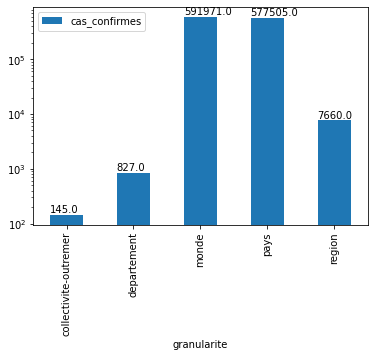

In [302]:
gr = g1.plot.bar(logy=True)

for p in gr.patches:
    gr.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.1))


In [167]:
df1.groupby('granularite')[['deces_ehpad','maille_nom','date']].max()

,deces_ehpad,maille_nom,date
granularite,,,
collectivite-outremer,NaN,Wallis et Futuna,2020-04-08
departement,NaN,Yvelines,2020-10-01
monde,NaN,Monde,2020-03-28
pays,10692.0,France,2020-10-01
region,NaN,Île-de-France,2020-10-01


In [95]:
dt_mx = df1[df1['granularite']=='pays'].groupby(['deces'])['date'].max()
dt_mx

deces
0.0        2020-02-13
1.0        2020-02-25
2.0        2020-03-01
3.0        2020-03-02
4.0        2020-03-04
              ...    
21201.0    2020-09-29
21240.0    2020-09-30
21264.0    2020-09-30
21303.0    2020-10-01
21327.0    2020-10-01
Name: date, Length: 373, dtype: object

In [115]:
st = df1[df1['granularite']=='pays'].groupby('date',as_index=False)['deces'].max()
st

,date,deces
0,2020-01-24,0.0
1,2020-01-25,0.0
2,2020-01-26,NaN
3,2020-01-27,0.0
4,2020-01-28,0.0
...,...,...
242,2020-09-27,21061.0
243,2020-09-28,21142.0
244,2020-09-29,21201.0
245,2020-09-30,21264.0


# Morts

/Users/Tomas/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date'>

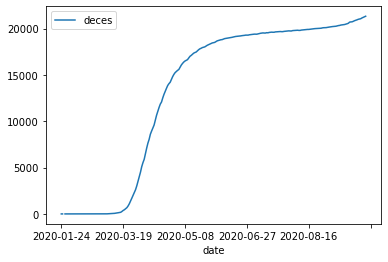

In [117]:
st.plot(x='date')

In [98]:
st_c = df1[df1['granularite']=='pays'].groupby('date',as_index=False)['cas_confirmes'].max()
st_c

,date,cas_confirmes
0,2020-01-24,3.0
1,2020-01-25,3.0
2,2020-01-26,3.0
3,2020-01-27,3.0
4,2020-01-28,4.0
...,...,...
242,2020-09-27,538569.0
243,2020-09-28,542639.0
244,2020-09-29,550690.0
245,2020-09-30,563535.0


# Malades

/Users/Tomas/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date'>

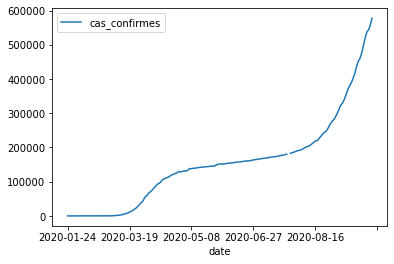

In [118]:
st_c.plot(x='date')

/Users/Tomas/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date'>

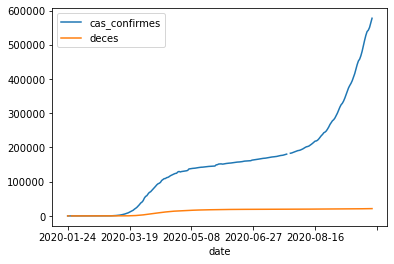

In [119]:
diff = df1[df1['granularite']=='pays'].groupby('date',as_index=False)[['cas_confirmes','deces']].max()
diff.plot(x='date')

/Users/Tomas/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date'>

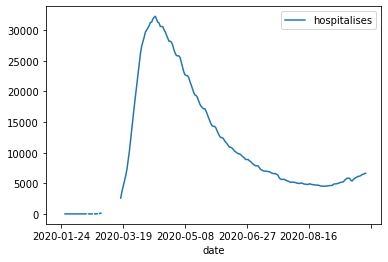

In [120]:
hop = df1[df1['granularite']=='pays'].groupby('date', as_index=False)['hospitalises'].max()
hop.plot(x='date')

/Users/Tomas/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date'>

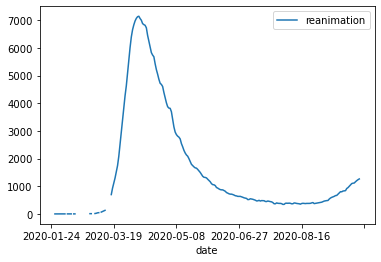

In [121]:
rea = df1[df1['granularite']=='pays'].groupby('date', as_index=False)['reanimation'].max()
rea.plot(x='date')

/Users/Tomas/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date'>

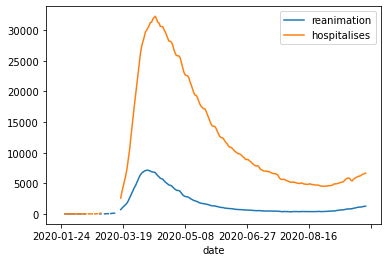

In [122]:
new = df1[df1['granularite']=='pays'].groupby('date', as_index=False)[['reanimation','hospitalises']].max()
new.plot(x='date')

/Users/Tomas/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date'>

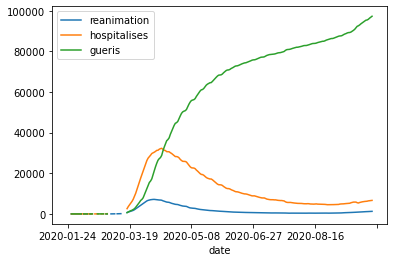

In [123]:
new2 = df1[df1['granularite']=='pays'].groupby('date', as_index=False)[['reanimation','hospitalises','gueris']].max()
new2.plot(x='date')

# Pics

In [153]:
pic = df1[df1['granularite']=='pays'].groupby('hospitalises')['date'].max()
pic.tail()

hospitalises
31826.0    2020-04-12
31952.0    2020-04-13
32113.0    2020-04-13
32131.0    2020-04-14
32292.0    2020-04-14
Name: date, dtype: object

In [152]:
pic_rea = df1[df1['granularite']=='pays'].groupby('reanimation')['date'].max()
pic_rea.tail()

reanimation
7019.0    2020-04-08
7066.0    2020-04-09
7072.0    2020-04-06
7131.0    2020-04-07
7148.0    2020-04-08
Name: date, dtype: object

# EHPAD

/Users/Tomas/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date'>

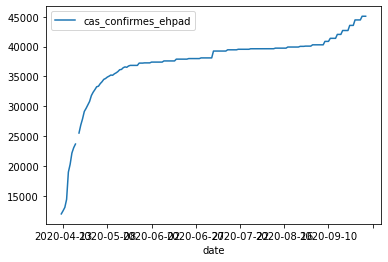

In [125]:
ep = df1[df1['granularite']=='pays'].groupby('date',as_index=False)['cas_confirmes_ehpad'].max()
ep.plot(x='date')

/Users/Tomas/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date'>

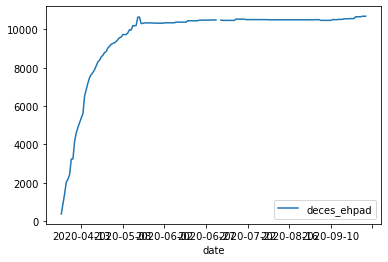

In [126]:
ep2 = df1[df1['granularite']=='pays'].groupby('date',as_index=False)['deces_ehpad'].max()
ep2.plot(x='date')

/Users/Tomas/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date'>

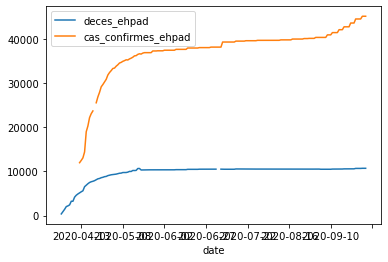

In [127]:
ep3 = df1[df1['granularite']=='pays'].groupby('date',as_index=False)[['deces_ehpad','cas_confirmes_ehpad']].max()
ep3.plot(x='date')

/Users/Tomas/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date'>

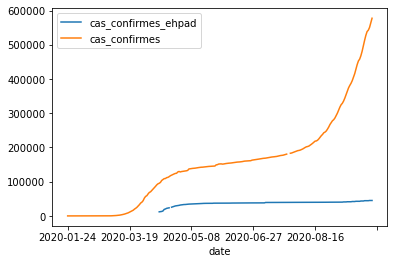

In [128]:
ep4 = df1[df1['granularite']=='pays'].groupby('date',as_index=False)[['cas_confirmes_ehpad','cas_confirmes']].max()
ep4.plot(x='date')

## 2ème Dataset: Informations cas Covid-19 en France

In [15]:
c2 = pd.read_csv("datasets/covid-19-pandemic-worldwide-data-fr.csv", delimiter=';')

df2 = pd.DataFrame(c2)
df2

,Zone,Sub Zone,Category,Date,Count,Location
0,France,French Guiana,Deaths,2020-04-03,0,"3.9339,-53.1258"
1,France,French Guiana,Deaths,2020-04-16,0,"3.9339,-53.1258"
2,France,French Guiana,Deaths,2020-03-20,0,"3.9339,-53.1258"
3,France,French Guiana,Deaths,2020-04-17,0,"3.9339,-53.1258"
4,France,French Guiana,Deaths,2020-07-21,39,"3.9339,-53.1258"
...,...,...,...,...,...,...
8311,France,Guadeloupe,Deaths,2020-09-24,42,"16.265,-61.551"
8312,France,Guadeloupe,Deaths,2020-02-13,0,"16.265,-61.551"
8313,France,Guadeloupe,Deaths,2020-06-01,14,"16.265,-61.551"
8314,France,Guadeloupe,Deaths,2020-03-10,0,"16.265,-61.551"


In [16]:
df2['Category'].unique()

array(['Deaths', 'Confirmed', 'Recovered'], dtype=object)

## 3ème Dataset: Informations cas Covid-19 dans le monde

In [171]:
c3 = pd.read_csv("datasets/covid-19-pandemic-worldwide-data.csv", delimiter=';')

df_world = pd.DataFrame(c3)
subset = df_world[['Zone','Category','Date','Count']]
subset

,Zone,Category,Date,Count
0,Saint Lucia,Recovered,2020-09-12,26
1,Saint Lucia,Recovered,2020-05-17,18
2,Saint Lucia,Recovered,2020-08-15,25
3,Saint Lucia,Recovered,2020-02-10,0
4,Saint Lucia,Recovered,2020-09-26,27
...,...,...,...,...
197815,United Kingdom,Recovered,2020-03-03,0
197816,United Kingdom,Recovered,2020-05-15,457
197817,United Kingdom,Recovered,2020-06-09,512
197818,United Kingdom,Recovered,2020-06-10,512


In [238]:
res = subset[(subset['Category'] == 'Recovered')&(subset['Date'] == '2020-08-01')].groupby(['Zone'])['Category','Count','Date']
res = pd.DataFrame(res.first())

res2 = subset[(subset['Category'] == 'Recovered')&(subset['Date'] == '2020-09-01')].groupby(['Zone'])['Category','Count','Date']
res2 = pd.DataFrame(res2.first())
res2 = res2.rename(columns={'Count': 'Count2'})

<ipython-input-238-6693572e12a6>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  res = subset[(subset['Category'] == 'Recovered')&(subset['Date'] == '2020-08-01')].groupby(['Zone'])['Category','Count','Date']
<ipython-input-238-6693572e12a6>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  res2 = subset[(subset['Category'] == 'Recovered')&(subset['Date'] == '2020-09-01')].groupby(['Zone'])['Category','Count','Date']


In [299]:
res3 = pd.concat([res,res2],axis=1,sort=True)
resdif = res3['Count2']-res3['Count']
resdif = pd.DataFrame(resdif)

pl = resdif.plot.bar(figsize=(150, 7),logy=True, title="Evol aout-sept")

for p in pl.patches:
    pl.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.1))


In [259]:
cat_zone = df_world.groupby(['Category','Zone'])['Count'].sum()
cat_zone

Category   Zone              
Confirmed  Afghanistan           4370079
           Albania                784054
           Algeria               3889660
           Andorra                172683
           Angola                 192654
                                  ...   
Recovered  West Bank and Gaza    1024248
           Western Sahara           1160
           Yemen                   93580
           Zambia                 717814
           Zimbabwe               276877
Name: Count, Length: 564, dtype: int64

In [260]:
df_world['Date'].max()

'2020-09-29'